In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [20]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("/kaggle/input/creditcard/Creditcard_data.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(772, 31)

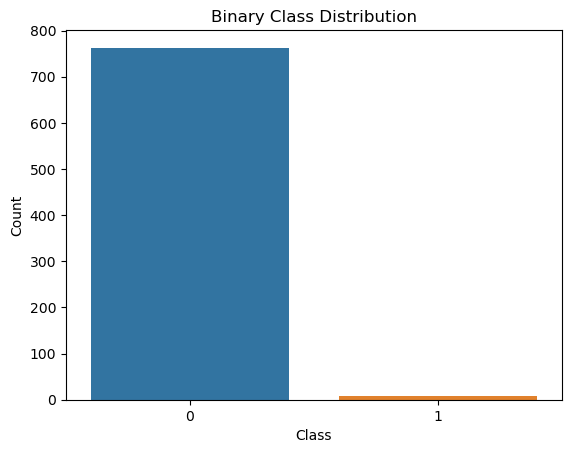

In [9]:
sns.countplot(x="Class", data=data)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Binary Class Distribution')

plt.show()

In [10]:
x = data.iloc[:,1:29]

In [11]:
y = data.iloc[:,-1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
train_class_dist = y_train.value_counts(normalize=True)
test_class_dist = y_test.value_counts(normalize=True)

print("Training set class distribution:\n", train_class_dist)
print("Testing set class distribution:\n", test_class_dist)

Training set class distribution:
 0    0.988655
1    0.011345
Name: Class, dtype: float64
Testing set class distribution:
 0    0.987097
1    0.012903
Name: Class, dtype: float64


In [14]:
print(X_train.shape)
print(y_train.shape)

(617, 28)
(617,)


In [15]:
#Random Oversampling
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

sample_size = len(X_train_resampled) // 5
samples = []
for i in range(5):
    sample_indices = np.random.choice(len(X_train_resampled), sample_size, replace=True)
    X_sample = X_train_resampled.iloc[sample_indices, :]
    y_sample = y_train_resampled.iloc[sample_indices]
    samples.append((X_sample, y_sample))

In [22]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

models = [AdaBoostClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), XGBClassifier()]
for i, (X_sample, y_sample) in enumerate(samples):
    print(f"Sample {i+1}:")
    for model in models:
        print(f"\t{model.__class__.__name__}:")
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred, zero_division=1))
        print("Kappa Score: ",cohen_kappa_score(y_test,y_pred))
        cm = confusion_matrix(y_test, y_pred)
        print(cm)

Sample 1:
	AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.50      0.50      0.50         2

    accuracy                           0.99       155
   macro avg       0.75      0.75      0.75       155
weighted avg       0.99      0.99      0.99       155

Kappa Score:  0.4934640522875817
[[152   1]
 [  1   1]]
	RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       153
           1       1.00      0.50      0.67         2

    accuracy                           0.99       155
   macro avg       1.00      0.75      0.83       155
weighted avg       0.99      0.99      0.99       155

Kappa Score:  0.6637744034707158
[[153   0]
 [  1   1]]
	ExtraTreesClassifier:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       153
           1       1.00      0.50      0.67   

In [ ]:
#Random Undersampling
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

sample_size = len(X_train) // 5
samples = []
for i in range(5):
    sample_indices = np.random.choice(len(X_train_resampled), sample_size, replace=True)
    X_sample = X_train_resampled.iloc[sample_indices, :]
    y_sample = y_train_resampled.iloc[sample_indices]
    samples.append((X_sample, y_sample))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

models = [AdaBoostClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), XGBClassifier()]
for i, (X_sample, y_sample) in enumerate(samples):
    print(f"Sample {i+1}:")
    for model in models:
        print(f"\t{model.__class__.__name__}:")
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred, zero_division=1))

In [ ]:
#Combined sampling(SMOTE)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

sample_size = len(X_train) // 5
samples = []
for i in range(5):
    sample_indices = np.random.choice(len(X_train_resampled), sample_size, replace=True)
    X_sample = X_train_resampled.iloc[sample_indices, :]
    y_sample = y_train_resampled.iloc[sample_indices]
    samples.append((X_sample, y_sample))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

models = [AdaBoostClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), XGBClassifier()]
for i, (X_sample, y_sample) in enumerate(samples):
    print(f"Sample {i+1}:")
    for model in models:
        print(f"\t{model.__class__.__name__}:")
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred, zero_division=1))

In [ ]:
#ADASYN sampling
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

sample_size = len(X_train) // 5
samples = []
for i in range(5):
    sample_indices = np.random.choice(len(X_train_resampled), sample_size, replace=True)
    X_sample = X_train_resampled.iloc[sample_indices, :]
    y_sample = y_train_resampled.iloc[sample_indices]
    samples.append((X_sample, y_sample))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

models = [AdaBoostClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), XGBClassifier()]
for i, (X_sample, y_sample) in enumerate(samples):
    print(f"Sample {i+1}:")
    for model in models:
        print(f"\t{model.__class__.__name__}:")
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred, zero_division=1))

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import classification_report

eec = EasyEnsembleClassifier(n_estimators=10, random_state=42)

# create 5 samples
sample_size = len(X_train_resampled) // 5
samples = []
for i in range(5):
    sample_indices = np.random.choice(len(X_train_resampled), sample_size, replace=True)
    X_sample = X_train_resampled.iloc[sample_indices, :]
    y_sample = y_train_resampled.iloc[sample_indices]
    samples.append((X_sample, y_sample))

for i, (X_sample, y_sample) in enumerate(samples):
    print(f"Sample {i+1}:")
    eec.fit(X_sample, y_sample)
    y_pred = eec.predict(X_test)
    print(classification_report(y_test, y_pred, zero_division=1))

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

models = [AdaBoostClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), XGBClassifier()]

for i, (X_sample, y_sample) in enumerate(samples):
    print(f"Sample {i+1}:")
    for model in models:
        print(f"\t{model.__class__.__name__}:")
        model.fit(X_sample, y_sample)
        y_scores = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_scores)
        pr_auc = auc(recall, precision)
        print(f"\t\tPR AUC: {pr_auc:.3f}")